Dataset shape: (56992, 20)

Checking missing values in Train dataset...
Missing values found:
delivery_person_age        1854
delivery_person_ratings    1908
time_ordered               1731
weather_conditions          616
road_traffic_density        601
multiple_deliveries         993
is_festival                 228
city                       1200
dtype: int64

Checking missing values in Test dataset...
Missing values found:
delivery_person_age        491
delivery_person_ratings    507
time_ordered               444
weather_conditions         158
road_traffic_density       154
multiple_deliveries        238
is_festival                 65
city                       324
dtype: int64

Data types:
order_id                         object
 delivery_person_id              object
 delivery_person_age             object
 delivery_person_ratings         object
 restaurant_latitude            float64
 restaurant_longitude           float64
 delivery_location_latitude     float64
 delivery_locatio

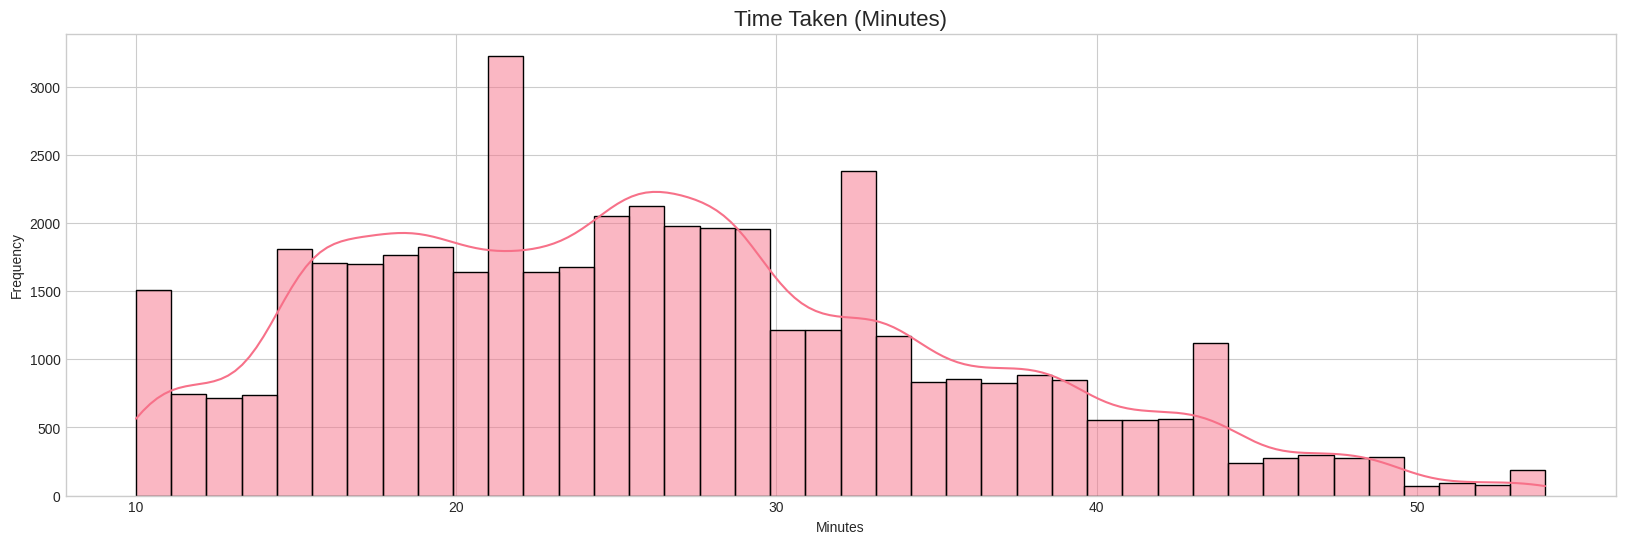

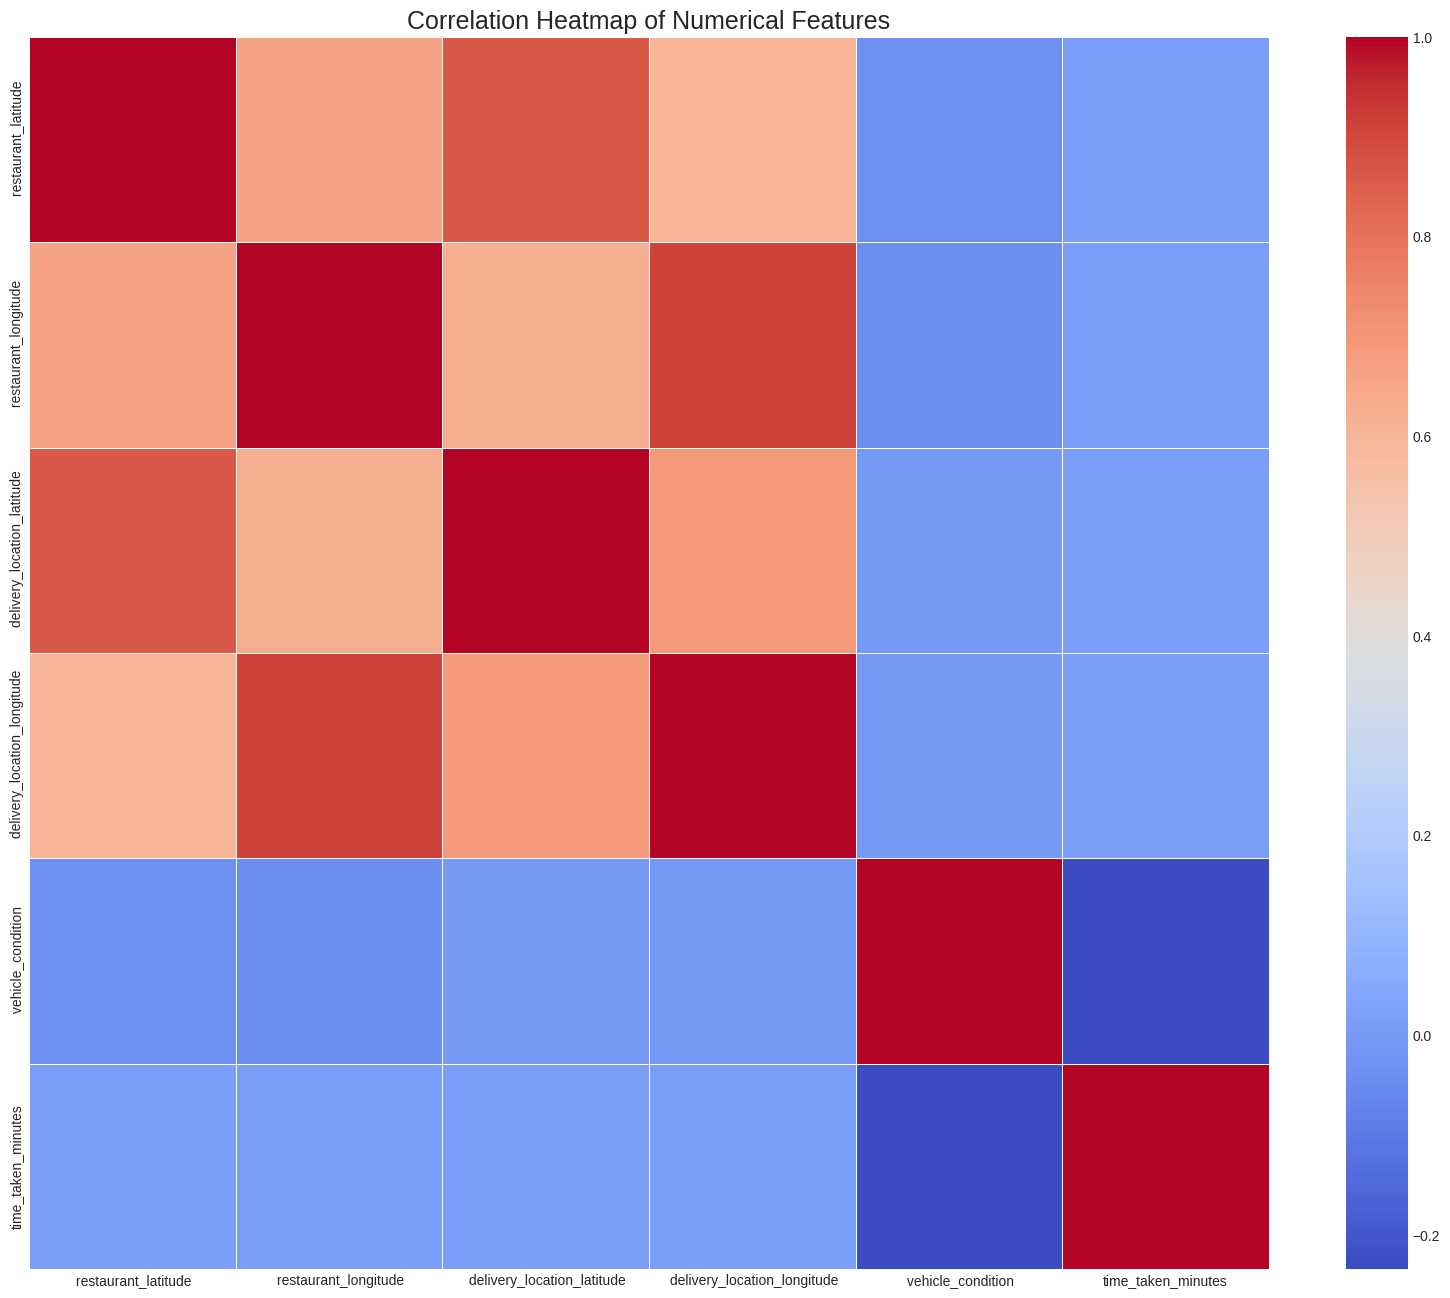

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure pandas DataFrame display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", None)

# Configure plotting style and color palette
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# Load the dataset
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

# Convert "NaN" strings to actual NaN values
test_df = test_df.replace("NaN", float(np.nan), regex=True)
train_df = train_df.replace("NaN", float(np.nan), regex=True)

# Combine test and train for data analysis
df = pd.concat([test_df, train_df], ignore_index=True)

# # Apply strip to remove leading/trailing whitespace from each column
for col in df.select_dtypes(["object"]).columns:
    df[col] = df[col].str.strip()

print(f"Dataset shape: {df.shape}")

for name, data in [("Train", train_df), ("Test", test_df)]:
    print(f"\nChecking missing values in {name} dataset...")
    if data.isnull().sum().sum() > 0:
        print("Missing values found:")
        print(data.isnull().sum()[data.isnull().sum() > 0])
    else:
        print("No missing values found.")


print("\nData types:")
print(df.dtypes)

print("\nBasic statistics for numerical columns:")
print(df.describe())

# Plot the distribution of the target variable: 'time_taken_minutes'
plt.figure(figsize=(20, 6))
df["time_taken_minutes"] = df["time_taken_minutes"].str.extract(r"(\d+)").astype(float)
sns.histplot(df["time_taken_minutes"], kde=True, bins=40)
plt.title("Time Taken (Minutes)", fontsize=16)
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

# Create a correlation heatmap from numerical columns
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 16))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.show()
